# COVID19 England rate of over 70 deaths

Get the data from the official UK repository and drop the columns we are not interested in.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas

url = "https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv"
data = pandas.read_csv(url).drop(['areaType', 'areaCode', 'areaName', 'metric', 'rollingRate', 'rollingSum'], 1)

Remove existing aggregated data, so that we can make our own aggregations

In [2]:
data = data[~data.age.isin(['00_59', '60+'])]
data[data.date.eq('2021-01-01')]

,date,age,deaths
714,2021-01-01,00_04,0
715,2021-01-01,10_14,0
716,2021-01-01,15_19,0
717,2021-01-01,20_24,0
718,2021-01-01,25_29,0
719,2021-01-01,30_34,6
720,2021-01-01,35_39,4
721,2021-01-01,40_44,1
722,2021-01-01,45_49,9
723,2021-01-01,50_54,6


<AxesSubplot:xlabel='date'>

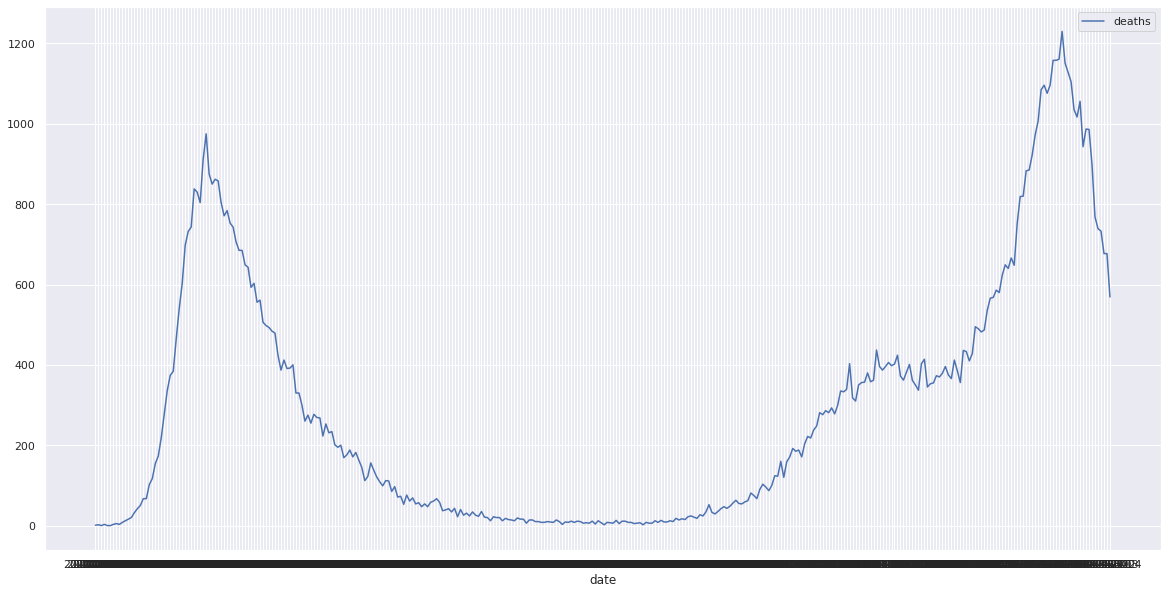

In [3]:
sns.set_theme()
plt.subplots(figsize=(20,10))
sns.lineplot(data=data.groupby('date').sum())